In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics, model_selection

In [2]:
qtltable = pd.read_csv("C:/Users/Jennifer Chen/Desktop/spring 2020/honors project/data/CC54qtltable.txt",delimiter="\t")
ytable = pd.read_csv("C:/Users/Jennifer Chen/Desktop/spring 2020/honors project/data/ytable.txt",delimiter="\t")
marker_anno = pd.read_csv("C:/Users/Jennifer Chen/Desktop/spring 2020/honors project/data/marker_anno_mm10.txt",delimiter="\t")

In [3]:
ytablej = pd.read_csv("C:/Users/Jennifer Chen/Desktop/spring 2020/honors project/data/ytable_extra_J.txt",delimiter="\t")

In [4]:
print(ytable.shape)
ytable[:3]

(171, 4)


,Animal_Number,CCline,log.ALT,log.AST
0,11,CC050,4.663439,5.659482
1,12,CC050,4.521789,5.420535
2,13,CC050,4.007333,5.117994


In [5]:
print(ytablej.shape)
ytablej[:3]

(180, 6)


,Animal_Number,CCline,Dosing.Date,Dosing.BW,ALT,AST
0,11,CC050,2/19/14,22.75,106.0,287.0
1,12,CC050,2/24/14,21.27,92.0,226.0
2,13,CC050,3/12/14,21.28,55.0,167.0


In [6]:
print(qtltable.shape)
qtltable[:16]

(61128, 54)


,CC001,CC002,CC003,CC004,CC005,CC006,CC007,CC008,CC010,CC011,...,CC055,CC057,CC058,CC059,CC060,CC061,CC063,CC065,CC070,CC071
UNC6.A,2.700000e-06,2.700000e-06,2.700000e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.999944e-01,9.999944e-01,...,2.250000e-07,2.701500e-06,0.000000e+00,2.700000e-06,0.000000e+00,5.000000e-11,9.760000e-07,2.700000e-06,9.005000e-07,0.000000e+00
UNC6.B,9.999929e-01,9.999929e-01,9.999929e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.700000e-06,2.700000e-06,...,2.250000e-07,4.198450e-06,0.000000e+00,9.999929e-01,0.000000e+00,0.000000e+00,1.466950e-06,4.125050e-06,1.375050e-06,0.000000e+00
UNC6.C,0.000000e+00,0.000000e+00,0.000000e+00,2.250000e-07,8.625000e-06,2.950000e-06,9.999896e-01,1.575000e-06,0.000000e+00,0.000000e+00,...,1.200000e-09,1.500000e-10,2.250000e-07,1.500000e-10,7.499939e-01,2.290000e-07,0.000000e+00,0.000000e+00,4.999965e-01,8.625000e-06
UNC6.D,0.000000e+00,0.000000e+00,0.000000e+00,2.250000e-07,9.999896e-01,4.999966e-01,8.625000e-06,1.575000e-06,0.000000e+00,0.000000e+00,...,1.200000e-09,1.500000e-10,2.250000e-07,1.500000e-10,5.750400e-06,2.290500e-07,0.000000e+00,0.000000e+00,2.875050e-06,9.999896e-01
UNC6.E,4.125000e-06,4.125000e-06,4.125000e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.701500e-06,2.700000e-06,...,2.250000e-07,9.999929e-01,0.000000e+00,4.125000e-06,0.000000e+00,0.000000e+00,4.999977e-01,9.999929e-01,4.999976e-01,0.000000e+00
UNC6.F,0.000000e+00,0.000000e+00,0.000000e+00,2.250000e-07,1.575000e-06,6.000000e-07,1.575000e-06,9.999966e-01,0.000000e+00,0.000000e+00,...,1.200000e-09,2.500000e-10,2.250000e-07,1.500000e-10,2.500002e-01,2.271000e-07,2.000000e-10,0.000000e+00,5.250000e-07,1.575000e-06
UNC6.G,0.000000e+00,0.000000e+00,0.000000e+00,9.999993e-01,2.250000e-07,4.999999e-01,2.250000e-07,2.250000e-07,0.000000e+00,0.000000e+00,...,1.200000e-09,1.500000e-10,9.999993e-01,1.500000e-10,1.503000e-07,9.999993e-01,2.000000e-10,0.000000e+00,7.500000e-08,2.250000e-07
UNC6.H,2.250000e-07,2.250000e-07,2.256000e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.250000e-07,2.250000e-07,...,9.999993e-01,2.254500e-07,0.000000e+00,2.250000e-07,0.000000e+00,1.000000e-10,4.999998e-01,2.250000e-07,7.500000e-08,0.000000e+00
UNC010001943.A,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,1.500000e-09,3.208850e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-10,0.000000e+00
UNC010001943.B,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,7.050000e-09,3.350000e-08,1.000000e+00,0.000000e+00,0.000000e+00,1.200000e-09,0.000000e+00,0.000000e+00,0.000000e+00


In [7]:
qtltable.T[-3:]

,UNC6.A,UNC6.B,UNC6.C,UNC6.D,UNC6.E,UNC6.F,UNC6.G,UNC6.H,UNC010001943.A,UNC010001943.B,...,UNC31591516.G,UNC31591516.H,UNC31593544.A,UNC31593544.B,UNC31593544.C,UNC31593544.D,UNC31593544.E,UNC31593544.F,UNC31593544.G,UNC31593544.H
CC065,2.700000e-06,0.000004,0.000000,0.000000,0.999993,0.000000e+00,0.000000e+00,2.250000e-07,0.000000e+00,0.0,...,7.250000e-06,0.000000e+00,4.875200e-06,9.999750e-01,8.850000e-09,4.875000e-06,2.100000e-06,7.000000e-10,1.315000e-05,0.000000e+00
CC070,9.005000e-07,0.000001,0.499997,0.000003,0.499998,5.250000e-07,7.500000e-08,7.500000e-08,5.000000e-10,0.0,...,0.000000e+00,2.020000e-08,1.973000e-07,1.973000e-07,5.070000e-08,1.973000e-07,1.569000e-07,9.999990e-01,1.466000e-07,6.650000e-08
CC071,0.000000e+00,0.000000,0.000009,0.999990,0.000000,1.575000e-06,2.250000e-07,0.000000e+00,0.000000e+00,0.0,...,2.200000e-07,0.000000e+00,1.105260e-01,9.522927e-04,2.000000e-09,8.885175e-01,1.866900e-06,0.000000e+00,2.414850e-06,0.000000e+00


In [8]:
print(marker_anno.shape)
marker_anno[:3]

(7641, 3)


,marker,chr,pos
0,UNC6,1,3.010274
1,UNC010001943,1,3.977130
2,UNC23507,1,5.032086


In [9]:
qtl_new = qtltable.reset_index()
qtl_new['locus'] = [x.split('.')[0] for x in qtl_new['index']]
qtl_new[:3]

,index,CC001,CC002,CC003,CC004,CC005,CC006,CC007,CC008,CC010,...,CC057,CC058,CC059,CC060,CC061,CC063,CC065,CC070,CC071,locus
0,UNC6.A,0.000003,0.000003,0.000003,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.999994,...,2.701500e-06,0.000000e+00,2.700000e-06,0.000000,5.000000e-11,9.760000e-07,0.000003,9.005000e-07,0.000000,UNC6
1,UNC6.B,0.999993,0.999993,0.999993,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000003,...,4.198450e-06,0.000000e+00,9.999929e-01,0.000000,0.000000e+00,1.466950e-06,0.000004,1.375050e-06,0.000000,UNC6
2,UNC6.C,0.000000,0.000000,0.000000,2.250000e-07,0.000009,0.000003,0.99999,0.000002,0.000000,...,1.500000e-10,2.250000e-07,1.500000e-10,0.749994,2.290000e-07,0.000000e+00,0.000000,4.999965e-01,0.000009,UNC6


In [10]:
len(set(qtl_new['locus']) & set(marker_anno['marker']))

7641

In [11]:
qtl_merged = qtl_new.merge(marker_anno,left_on="locus", right_on="marker")

In [12]:
print(qtl_merged.shape)
qtl_merged[:80:8]

(61128, 59)


,index,CC001,CC002,CC003,CC004,CC005,CC006,CC007,CC008,CC010,...,CC060,CC061,CC063,CC065,CC070,CC071,locus,marker,chr,pos
0,UNC6.A,0.000003,0.000003,0.000003,0.0,0.0,0.0,0.0,0.000000,0.999994,...,0.0,5.000000e-11,9.760000e-07,2.700000e-06,9.005000e-07,0.000000e+00,UNC6,UNC6,1,3.010274
8,UNC010001943.A,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-10,0.000000e+00,UNC010001943,UNC010001943,1,3.977130
16,UNC23507.A,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.299980,1.000000,...,0.0,0.000000e+00,1.500000e-10,0.000000e+00,4.000000e-10,0.000000e+00,UNC23507,UNC23507,1,5.032086
24,UNC38030.A,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.999990,1.000000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,UNC38030,UNC38030,1,6.671327
32,UNC49759.A,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.999995,1.000000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,UNC49759,UNC49759,1,7.548683
40,UNC58412.A,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.999999,1.000000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,UNC58412,UNC58412,1,8.051126
48,JAX00000461.A,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,...,0.0,0.000000e+00,0.000000e+00,1.000000e-10,0.000000e+00,0.000000e+00,JAX00000461,JAX00000461,1,9.247980
56,UNC86282.A,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,...,0.0,0.000000e+00,0.000000e+00,1.000000e-09,0.000000e+00,0.000000e+00,UNC86282,UNC86282,1,10.014552
64,UNC90639.A,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,...,0.0,0.000000e+00,0.000000e+00,1.000000e-09,0.000000e+00,0.000000e+00,UNC90639,UNC90639,1,10.452345
72,UNC95979.A,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,...,0.0,0.000000e+00,3.000000e-10,1.300000e-09,3.000000e-10,1.000000e-10,UNC95979,UNC95979,1,10.898627


In [13]:
qtl_merged = qtl_merged.replace('X', 20)
qtl_merged['chr'] = pd.to_numeric(qtl_merged['chr'])

In [27]:
qtl_merged = qtl_merged.sort_values(['chr','pos'])
qtl_merged = qtl_merged.reset_index()

In [28]:
qtl_first = qtl_merged
qtl_first = qtl_first.drop_duplicates(subset ="chr", keep = "first", inplace = False)
print(qtl_first.shape)
qtl_first

(20, 60)


,level_0,index,CC001,CC002,CC003,CC004,CC005,CC006,CC007,CC008,...,CC060,CC061,CC063,CC065,CC070,CC071,locus,marker,chr,pos
0,0,UNC6.A,2.700000e-06,2.700000e-06,2.700000e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.000000e-11,9.760000e-07,2.700000e-06,9.005000e-07,0.000000e+00,UNC6,UNC6,1,3.010274
4424,30776,UNC2470924.A,9.999995e-01,2.501350e-05,3.000000e-09,4.500000e-07,9.999995e-01,0.000000e+00,0.000000e+00,1.500000e-09,...,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e-09,0.000000e+00,4.500000e-07,UNC2470924,UNC2470924,2,3.565055
8856,35208,JAX00103749.A,9.999991e-01,0.000000e+00,0.000000e+00,2.250000e-07,2.250000e-07,0.000000e+00,2.250000e-07,2.250000e-07,...,9.999991e-01,9.999991e-01,0.000000e+00,2.250000e-07,2.250000e-07,2.250000e-07,JAX00103749,JAX00103749,3,3.199339
12480,38832,UNC6639515.A,0.000000e+00,0.000000e+00,3.083000e-07,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,UNC6639515,UNC6639515,4,3.858108
16032,42384,UNC8542757.A,4.500000e-07,4.500000e-07,3.000000e-10,0.000000e+00,9.999991e-01,0.000000e+00,4.150016e-01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,9.999991e-01,0.000000e+00,0.000000e+00,UNC8542757,UNC8542757,5,3.583415
19608,45960,JAX00601915.A,0.000000e+00,0.000000e+00,0.000000e+00,2.212460e-05,5.962070e-05,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.212800e-05,0.000000e+00,0.000000e+00,2.212445e-05,1.475125e-05,JAX00601915,JAX00601915,6,4.034107
22984,49336,UNC070001815.A,0.000000e+00,9.999216e-01,5.874730e-05,0.000000e+00,8.237050e-05,2.612425e-05,5.000000e-01,0.000000e+00,...,9.999216e-01,0.000000e+00,0.000000e+00,0.000000e+00,7.837050e-05,0.000000e+00,UNC070001815,UNC070001815,7,3.645048
26624,52976,JAX00659340.A,9.999943e-01,0.000000e+00,1.108500e-07,7.049947e-01,0.000000e+00,9.999943e-01,0.000000e+00,0.000000e+00,...,0.000000e+00,1.634300e-06,9.300000e-09,5.625000e-06,0.000000e+00,0.000000e+00,JAX00659340,JAX00659340,8,3.684153
29728,56080,JAX00684548.A,0.000000e+00,0.000000e+00,2.275000e-07,2.256000e-07,4.500000e-10,9.991748e-01,2.254500e-07,3.201355e-05,...,5.420500e-03,5.852923e-01,0.000000e+00,2.250000e-07,7.500000e-07,2.265000e-07,JAX00684548,JAX00684548,9,3.369866
32848,4424,JAX00282074.A,8.625000e-06,0.000000e+00,8.625000e-06,4.500000e-10,1.500000e-10,0.000000e+00,0.000000e+00,7.500000e-10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,JAX00282074,JAX00282074,10,7.811239


In [36]:
qtl_first.index//8+1

Int64Index([   1,  554, 1108, 1561, 2005, 2452, 2874, 3329, 3717, 4107, 4490,
            4928, 5285, 5654, 5980, 6283, 6575, 6880, 7158, 7401],
           dtype='int64')

In [30]:
qtl_last = qtl_merged
qtl_last = qtl_last.drop_duplicates(subset ="chr", keep = "last", inplace = False)
print(qtl_last.shape)
qtl_last

(20, 60)


,level_0,index,CC001,CC002,CC003,CC004,CC005,CC006,CC007,CC008,...,CC060,CC061,CC063,CC065,CC070,CC071,locus,marker,chr,pos
4423,4423,UNC2465406.H,0.000000e+00,1.000000e+00,2.000000e-10,4.501500e-07,4.510500e-07,0.000000e+00,1.000000e+00,4.650000e-09,...,3.000000e-10,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,UNC2465406,UNC2465406,1,195.190413
8855,35207,UNC4609164.H,0.000000e+00,1.000000e+00,9.999802e-01,1.000000e+00,0.000000e+00,5.800000e-09,1.185000e-08,0.000000e+00,...,1.660000e-08,0.000000e+00,1.094000e-07,0.000000e+00,0.000000e+00,0.000000e+00,UNC4609164,UNC4609164,2,181.845800
12479,38831,UNC6635025.H,7.560000e-08,9.999997e-01,7.950000e-08,9.999985e-01,7.500000e-08,7.500000e-08,7.500000e-08,0.000000e+00,...,2.500000e-08,7.500000e-08,7.500000e-08,0.000000e+00,9.999997e-01,9.999997e-01,UNC6635025,UNC6635025,3,159.775786
16031,42383,UNC8537575.H,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,1.000000e+00,1.332000e-07,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,UNC8537575,UNC8537575,4,156.119928
19607,45959,UNC10459814.H,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.999998e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.500000e-10,UNC10459814,UNC10459814,5,151.221420
22983,49335,UNC12365447.H,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e-01,UNC12365447,UNC12365447,6,149.378790
26623,52975,UNC14049700.H,2.550000e-09,0.000000e+00,2.850000e-09,2.750000e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.050000e-09,1.500500e-07,9.999999e-01,5.000000e-01,UNC14049700,UNC14049700,7,145.135319
29727,56079,UNC15748701.H,7.500000e-08,7.500000e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.500000e-08,...,0.000000e+00,7.500000e-08,0.000000e+00,9.999998e-01,0.000000e+00,9.999998e-01,UNC15748701,UNC15748701,8,128.589736
32847,59199,UNC17311409.H,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,UNC17311409,UNC17311409,9,124.022342
35911,7487,UNC18986639.H,0.000000e+00,0.000000e+00,5.000000e-11,9.999594e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,UNC18986639,UNC18986639,10,130.377015


In [34]:
(qtl_last.index+1)/8

Float64Index([ 553.0, 1107.0, 1560.0, 2004.0, 2451.0, 2873.0, 3328.0, 3716.0,
              4106.0, 4489.0, 4927.0, 5284.0, 5653.0, 5979.0, 6282.0, 6574.0,
              6879.0, 7157.0, 7400.0, 7641.0],
             dtype='float64')

In [34]:
qtl_first_idx = list(qtl_first['index'])
qtl_last_idex = list(qtl_last['index'])

In [ ]:
qtl_idx = qtl_new
for index, row in qtl_idx.iterrows():
    if row['index'] not in qtl_first_idx + qtl_last_idex:
        qtl_idx = qtl_idx.drop([index])

In [ ]:
print(qtl_idx.shape)
qtl_idx

In [36]:
(qtl_idx.index[::2]//8

Int64Index([ 553,  936, 1374, 1731, 2100, 2426, 2729, 3021, 3326, 3604, 3847,
            4401, 4854, 5298, 5745, 6167, 6622, 7010, 7400, 7641],
           dtype='int64')

# Distribution of the outcomes

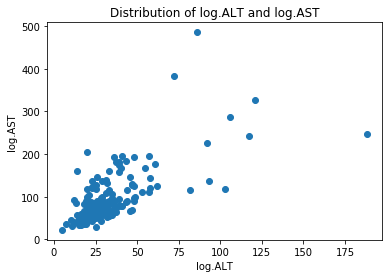

In [6]:
plt.scatter(ytable['ALT'], ytable['AST'])
plt.title("Distribution of log.ALT and log.AST")
plt.xlabel("log.ALT")
plt.ylabel("log.AST")
plt.show()

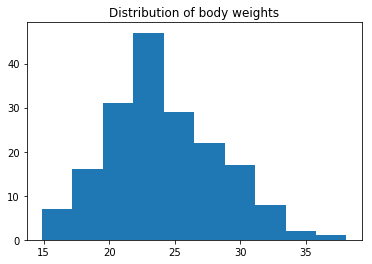

In [7]:
plt.hist(ytable['Dosing.BW'])
plt.title("Distribution of body weights")
plt.show()

# Preprocessing

qtltable: the original X table (61228, 54)
<br>
qtl_rep: the transposed qtltable with duplicate CClines and without unused CClines, matching samples from ytable_sorted (171, 61228)
<br>
qtl_trans: the transposed qtltable without unused CClines, matching samples from ytable_avg (45, 61228)
<br> <br>
ytable: the original y table (171, 4)
<br>
ytable_sorted: y table sorted by CCline (171, 2) (columns CCline and Animal Number are dropped)
<br>
ytable_avg: y table with the average outcome of samples grouped by CClines, sorted by CCline (45, 2)

In [13]:
ytable = ytable.dropna(axis='rows')
ytable.shape

(171, 6)

In [41]:
# qtl_rep

count_cc = {}
for index, row in ytable.iterrows():
    ccline = row.CCline
    if ccline not in count_cc.keys():
        count_cc[ccline] =0
    count_cc[ccline] +=1

qtl_rep = qtltable.T
for ccline in count_cc:
    if count_cc[ccline]>1:
        qtl_rep = qtl_rep.append([qtl_rep[qtl_rep.index == ccline]]*(count_cc[ccline]-1))
        
for index, row in qtl_rep.iterrows():
    if index not in count_cc:
        qtl_rep = qtl_rep.drop([index])

qtl_rep = qtl_rep.sort_index() 


# ytable_sorted

ytable_sorted = ytable.set_index('CCline').sort_index().drop(columns=['Animal_Number'])

In [13]:
qtl_rep.to_csv('C:/Users/Jennifer Chen/Desktop/spring 2020/honors project/data/qtl_rep_dropna.csv', index=True)  
ytable_sorted.to_csv('C:/Users/Jennifer Chen/Desktop/spring 2020/honors project/data/ytable_rep_dropna.csv', index=True) 

In [39]:
qtltable = qtl_merged.drop(columns = ['level_0','locus','marker','chr','pos'])
qtltable = qtltable.set_index('index', drop=True)
print(qtltable.shape)
qtltable[500:520]

(61128, 54)


,CC001,CC002,CC003,CC004,CC005,CC006,CC007,CC008,CC010,CC011,...,CC055,CC057,CC058,CC059,CC060,CC061,CC063,CC065,CC070,CC071
index,,,,,,,,,,,,,,,,,,,,,
UNC410424.E,0.0,0.0,5.000000e-10,0.0,0.0,0.999969,0.0,0.5,1.500000e-09,1.500000e-09,...,0.0,2.000000e-10,5.000000e-01,0.0,0.00,0.0,1.000000e+00,1.000000e+00,4.942235e-01,0.0
UNC410424.F,1.0,0.0,7.500000e-01,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.0,0.75,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
UNC410424.G,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,...,0.0,0.000000e+00,5.000000e-01,0.0,0.00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
UNC410424.H,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,...,0.0,1.000000e+00,0.000000e+00,1.0,0.00,0.0,0.000000e+00,0.000000e+00,8.000000e-10,0.0
UNC413360.A,0.0,0.0,2.500000e-01,0.0,0.0,0.000026,0.0,0.5,1.000000e+00,1.000000e+00,...,0.0,0.000000e+00,5.000000e-10,0.0,0.00,0.0,1.500000e-09,1.500000e-09,5.704070e-03,0.0
UNC413360.B,0.0,1.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.0,0.00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
UNC413360.C,0.0,0.0,0.000000e+00,1.0,0.0,0.000000,1.0,0.0,0.000000e+00,0.000000e+00,...,1.0,0.000000e+00,0.000000e+00,0.0,0.25,0.0,0.000000e+00,0.000000e+00,5.000000e-01,0.0
UNC413360.D,0.0,0.0,5.000000e-11,0.0,1.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.0,0.00,0.0,0.000000e+00,0.000000e+00,1.500000e-10,1.0
UNC413360.E,0.0,0.0,5.000000e-10,0.0,0.0,0.999974,0.0,0.5,1.500000e-09,1.500000e-09,...,0.0,2.250000e-09,5.000000e-01,0.0,0.00,0.0,1.000000e+00,1.000000e+00,4.942959e-01,0.0


In [42]:
# qtl_trans

qtl_trans = qtltable.T

for index, row in qtl_trans.iterrows():
    if index not in count_cc:
        qtl_trans = qtl_trans.drop([index])
        
qtl_trans = qtl_trans.sort_index() 

In [48]:
qtl_trans

index,UNC6.A,UNC6.B,UNC6.C,UNC6.D,UNC6.E,UNC6.F,UNC6.G,UNC6.H,UNC010001943.A,UNC010001943.B,...,UNC31591516.G,UNC31591516.H,UNC31593544.A,UNC31593544.B,UNC31593544.C,UNC31593544.D,UNC31593544.E,UNC31593544.F,UNC31593544.G,UNC31593544.H
CC001,2.700000e-06,9.999929e-01,0.000000e+00,0.000000e+00,4.125000e-06,0.000000e+00,0.000000e+00,2.250000e-07,0.000000e+00,1.000000e+00,...,1.300000e-09,4.000000e-10,8.633383e-03,5.897239e-03,9.710549e-01,8.633383e-03,2.527204e-03,1.400000e-09,3.253888e-03,3.100000e-09
CC002,2.700000e-06,9.999929e-01,0.000000e+00,0.000000e+00,4.125000e-06,0.000000e+00,0.000000e+00,2.250000e-07,0.000000e+00,1.000000e+00,...,6.300000e-09,0.000000e+00,4.950400e-06,3.950500e-06,1.270000e-08,4.950400e-06,9.999834e-01,1.100000e-08,2.683700e-06,0.000000e+00
CC003,2.700000e-06,9.999929e-01,0.000000e+00,0.000000e+00,4.125000e-06,0.000000e+00,0.000000e+00,2.256000e-07,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,2.104300e-06,2.101500e-06,3.000000e-10,2.104200e-06,9.999916e-01,0.000000e+00,2.100050e-06,5.000000e-11
CC004,0.000000e+00,0.000000e+00,2.250000e-07,2.250000e-07,0.000000e+00,2.250000e-07,9.999993e-01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,9.999787e-01,4.881000e-06,8.400000e-09,1.162640e-05,2.100000e-06,0.000000e+00,2.700000e-06,0.000000e+00
CC005,0.000000e+00,0.000000e+00,8.625000e-06,9.999896e-01,0.000000e+00,1.575000e-06,2.250000e-07,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,4.875500e-06,9.999854e-01,6.000000e-10,4.875000e-06,2.100000e-06,0.000000e+00,2.700000e-06,0.000000e+00
CC006,0.000000e+00,0.000000e+00,2.950000e-06,4.999966e-01,0.000000e+00,6.000000e-07,4.999999e-01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.162495e-05,4.875000e-06,1.860000e-08,9.999787e-01,2.100000e-06,0.000000e+00,2.700000e-06,0.000000e+00
CC007,0.000000e+00,0.000000e+00,9.999896e-01,8.625000e-06,0.000000e+00,1.575000e-06,2.250000e-07,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,2.100000e-06,2.100000e-06,0.000000e+00,2.100000e-06,9.999916e-01,0.000000e+00,2.100000e-06,0.000000e+00
CC008,0.000000e+00,0.000000e+00,1.575000e-06,1.575000e-06,0.000000e+00,9.999966e-01,2.250000e-07,0.000000e+00,0.000000e+00,0.000000e+00,...,8.291000e-07,0.000000e+00,4.954984e-04,4.803486e-04,5.924445e-01,4.954982e-04,4.623686e-04,4.051428e-01,4.788188e-04,1.601000e-07
CC010,9.999944e-01,2.700000e-06,0.000000e+00,0.000000e+00,2.701500e-06,0.000000e+00,0.000000e+00,2.250000e-07,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.162495e-05,4.875000e-06,1.650000e-09,9.999787e-01,2.100000e-06,0.000000e+00,2.700000e-06,0.000000e+00
CC011,9.999944e-01,2.700000e-06,0.000000e+00,0.000000e+00,2.700000e-06,0.000000e+00,0.000000e+00,2.250000e-07,1.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,2.696300e-06,2.696250e-06,6.359638e-04,2.696000e-06,2.097400e-06,0.000000e+00,9.993539e-01,0.000000e+00


In [13]:
gb = ytable.groupby('CCline')

CC_name = []
avg_ALT = []
avg_AST = []
avg_bw = []

for ccline in count_cc:
    CC_name.append(ccline)
    avg_ALT.append(np.average(gb.get_group(ccline)['log.ALT']))
    avg_AST.append(np.average(gb.get_group(ccline)['log.AST']))

ytable_avg = pd.DataFrame({'CCline': CC_name, 'ALT':avg_ALT,'AST':avg_AST}).set_index('CCline').sort_index()

In [14]:
ytable_avg.shape

(45, 2)

In [46]:
qtl_trans.to_csv('C:/Users/Jennifer Chen/Desktop/spring 2020/honors project/data/qtl_avg_final.csv', index=True)  

In [15]:
ytable_avg.to_csv('C:/Users/Jennifer Chen/Desktop/spring 2020/honors project/data/ytable_log.csv', index=True) 

# Correlation between neighbouring loci

In [10]:
corr_with_neighbour = []
for col_idx in range(8000):
    corr_with_neighbour.append(np.corrcoef(qtl_trans.iloc[:, col_idx], qtl_trans.iloc[:, col_idx+8])[0, 1])

np.average(corr_with_neighbour)

0.9897929946186622

#  Linear regression

In [11]:
X = qtl_rep
y = ytable_sorted['Dosing.BW']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=0)

In [12]:
def regression_metrics(y_test, y_predicted):
    explained_v = round(metrics.explained_variance_score(y_test, y_predicted), 4)
    mse = round(metrics.mean_squared_error(y_test, y_predicted), 4)
    r2_score = round(metrics.r2_score(y_test, y_predicted), 4)
    
    squared_err = (y_predicted-list(y_test))**2
    plt.plot(squared_err, '.')
    plt.title('Squared errors')
    print('explained variance:', explained_v, 'mean squared error:', mse, 'r2 score:', r2_score)

explained variance: -19.2094 mean squared error: 346.2672 r2 score: -19.2235


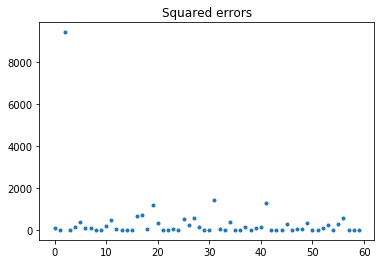

In [13]:
# linear regression
reg = linear_model.LinearRegression().fit(X_train, y_train)
y_predicted = reg.predict(X_test)
regression_metrics(y_test, y_predicted)

explained variance: 0.3839 mean squared error: 10.5488 r2 score: 0.3839


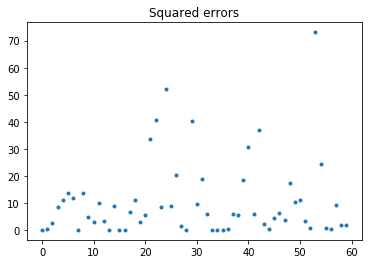

In [14]:
# ridge regression

reg = linear_model.Ridge(alpha = 0.05).fit(X_train, y_train)
y_predicted = reg.predict(X_test)
regression_metrics(y_test, y_predicted)

explained variance: 0.4369 mean squared error: 9.647 r2 score: 0.4366


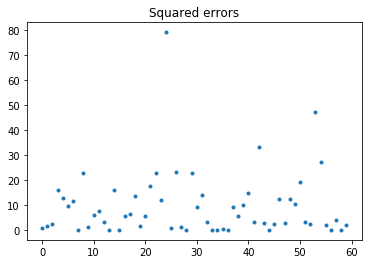

In [15]:
# Lasso

clf = linear_model.Lasso(alpha=0.05).fit(X_train, y_train)
y_predicted = clf.predict(X_test)
regression_metrics(y_test, y_predicted)

explained variance: 0.4517 mean squared error: 9.392 r2 score: 0.4515


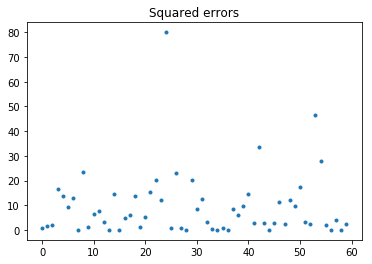

In [16]:
# ElasticNet

reg = linear_model.ElasticNet(alpha=0.1).fit(X_train, y_train)
y_predicted = reg.predict(X_test)
regression_metrics(y_test, y_predicted)

In [17]:
# Rounding data

qtl_rep_rounded = qtl_rep.round(0)

# genome scan: (predict the phenotype by one marker at a time, record the r-squares and plot)

markers = np.array(qtl_rep_rounded.columns).reshape(-1,8)

def genomeScan(outcome):
    r2 = []
    for marker in markers:
        X = qtl_rep_rounded[marker]
        y = ytable_sorted[outcome]
        reg = linear_model.LinearRegression().fit(X, y)
        y_predicted = reg.predict(X)
        r2.append(round(metrics.r2_score(y, y_predicted), 4))
    return r2
    
r2_weight_rounded = genomeScan('Dosing.BW')

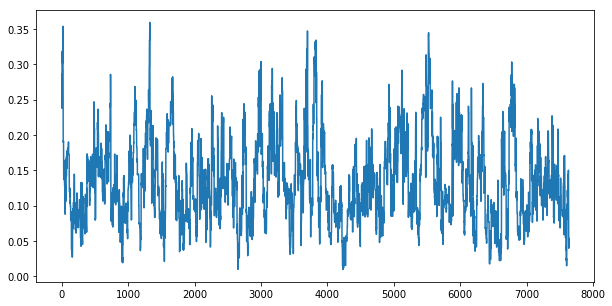

In [21]:
plt.figure(figsize=(10,5))
plt.plot(r2_weight_rounded)
#plt.plot(r2_ast, color = 'c')
#plt.plot(r2_alt, color = 'm')

In [20]:
# only keep the markers with high r2 score

mask = np.zeros(qtl_rep_rounded.shape[1]).reshape(8,-1).T

for i in range(len(mask)):
    if r2_weight_rounded[i] >= 0.33:
        mask[i] = np.ones(len(mask[i]))
    
mask = mask ==1  

qtl_rep_new_rounded = qtl_rep[qtl_rep.columns[mask.ravel()]]
print(qtl_rep_new_rounded.shape)

(180, 160)


In [ ]:
np.savetxt('../bios 694H/data/mask.txt', mask, delimiter=',')